# Comparison of bike sharing data
## by Florian Berger

## Investigation Overview

Within this investigation, I want to compare some important characteristics of bike sharing systems in the San Francisco and the Boston area. The main focus is on differences in utilization habits and economical aspects of the respective bike sharing systems.

## Dataset Overview
Two datasets have been used within this investigation. The dataset for the bike rental system in the San Francisco 
contains 2,407,259 observations and the dataset for the bikesharing system in Boston contains 2,522,537 observations. Each observation is the activity of a user who is accessing a rental bicycle at a specific location and returning it at 
the same or at another station of the bike sharing system.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe Part 1
df_clean = pd.read_csv('dataset_san_francisco_clean.csv')

In [3]:
# load in the dataset into a pandas dataframe Part 1
df2_clean = pd.read_csv('dataset_boston_clean.csv')

## Duration of rental bike utilization
Generally in San Francisco rental bikes are more often used for activites with a short duration (<800 sec) in the year 2019, while in Boston longer duration rentals (>800 sec) are performed more frequently.

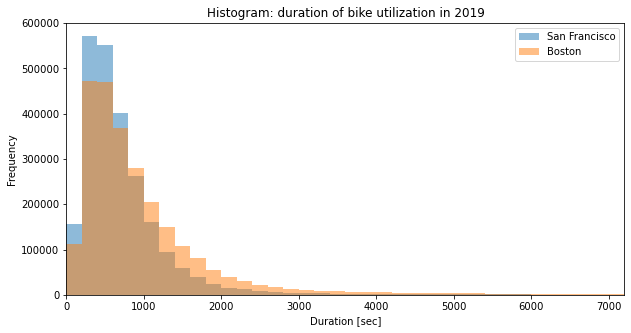

In [9]:
# Visual comparison of 'duration_sec' for San Francisco and Boston area with x axis limited from 0 to 7200sec (==2h)
plt.figure(figsize = [10,5])
bin_edges = np.arange(0, df_clean['duration_sec'].max()+5, 200)

plt.hist(data=df_clean, x = 'duration_sec', bins=bin_edges, alpha=.5)
plt.hist(data=df2_clean, x = 'duration_sec', bins=bin_edges, alpha=.5)

plt.title('Histogram: duration of bike utilization in 2019')
plt.legend(['San Francisco', 'Boston'])
plt.ylabel('Frequency')
plt.xlabel('Duration [sec]')
plt.xlim(0, 7200);
plt.xticks(rotation= 0);

## Bike utilization throughout the year

Bike utilization throughout the year varies strongly between San Francisco and Boston bike sharing systems. The differences in utilization throughout the months of the year 2019 is significantly smaller for San Francisco, probably due to more moderate climate conditions in the winter months.

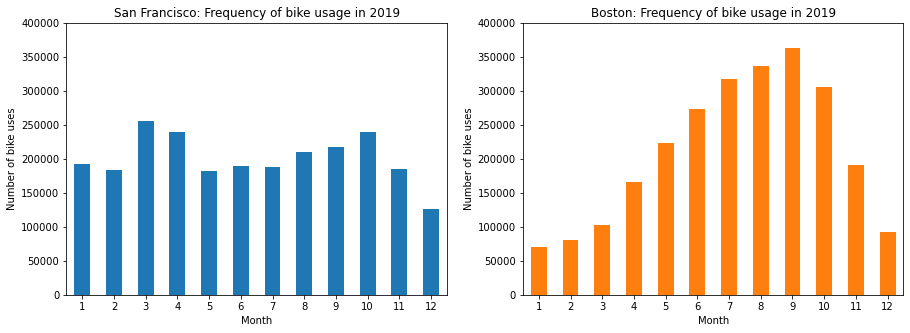

In [4]:
# Making sure column 'start_time' is in format 'datetime'
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df2_clean['start_time'] = pd.to_datetime(df2_clean['start_time'])

# Print histogram for bike usage in 2019
plt.figure(figsize = [15,5])
base_color = sb.color_palette()[1]

# Printing subplot #1
plt.subplot(1, 2, 1)
df_clean['start_time'].groupby(df_clean['start_time'].dt.month).count().plot(kind='bar')
plt.title('San Francisco: Frequency of bike usage in 2019')
plt.xlabel('Month')
plt.ylabel('Number of bike uses')
plt.ylim(0, 400000)
plt.xticks(rotation= 0)

# Printing subplot #2
plt.subplot(1, 2, 2)
df2_clean['start_time'].groupby(df2_clean['start_time'].dt.month).count().plot(kind='bar', color = base_color)
plt.title('Boston: Frequency of bike usage in 2019')
plt.xlabel('Month')
plt.ylabel('Number of bike uses')
plt.ylim(0, 400000)
plt.xticks(rotation= 0);

## Bike utilization level

The mean capacity utilization level of a rental bike in Boston in 2019 was way higher (around 2.5%) than in the San Francisco area (arount 0.5%). This is due to a lower number of available rental bikes, in average longer durations of bike rentals and slightly higher frequency of bike utilization within the area. It seems that the Boston bikesharing system has been run more efficiently.

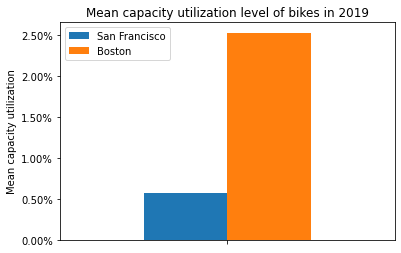

In [10]:
# Calculating the number of bikes in use
num_bikes_sf = df_clean.bike_id.nunique()
num_bikes_bo = df2_clean.bike_id.nunique()

# Calculating how often a bike gets used in average
mean_utilization_sf = df_clean.user_type.count()/num_bikes_sf
mean_utilization_bo = df2_clean.user_type.count()/num_bikes_bo

# Calculating utilization time per bike
mean_bike_usage_sf = df_clean.groupby('bike_id').duration_sec.sum().mean()
mean_bike_usage_bo = df2_clean.groupby('bike_id').duration_sec.sum().mean()

# Calculating the capacity utilization level
seconds_per_year = 365*24*60*60
capacity_util_sf = mean_bike_usage_sf/seconds_per_year
capacity_util_bo = mean_bike_usage_bo/seconds_per_year

# Creating dataframe for visualization puroposes
# Creating lists with calculated data
data_sf = [num_bikes_sf, mean_utilization_sf, mean_bike_usage_sf, capacity_util_sf]
data_bo = [num_bikes_bo, mean_utilization_bo, mean_bike_usage_bo, capacity_util_bo]

# Creating new datafrane
bike_utilization = pd.DataFrame()

# Adding calculated data to dataframe
bike_utilization['San Francisco'] = data_sf
bike_utilization['Boston'] = data_bo

# Adding index to dataframe
bike_utilization['index'] = ['', '', '', '']

# Splitting bike_utilization into single dataframes to facilitate plot creation
number_of_bikes = bike_utilization[0:1].copy()
mean_uses_per_bike = bike_utilization[1:2].copy()
capacity_utilization_per_bike = bike_utilization[3:4].copy()

# Plot graph for capacity utilization levels
ax = capacity_utilization_per_bike.set_index('index').plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Mean capacity utilization level of bikes in 2019')
plt.xlabel('')
plt.ylabel('Mean capacity utilization')
plt.xticks(rotation= 0);